# Online Retail Dataset

## Data Loading and Processing

In [91]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [67]:
# Loading the datasets

df = pd.read_excel('/Users/diegolemos/Masters/ProgrammingForAi/final_project/Online Retail.xlsx')

# Printing dataframe head
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [68]:
# Getting the informations from the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [69]:
# Checking the number of features and observations
df.shape

(541909, 8)

#### Insight
As we can see there are 541909 observations and 8 features in the dataset.

In [70]:
# Checking for missing values
print(f'Missing values for online retail dataframe: \n{df.isnull().sum()}')

Missing values for online retail dataframe: 
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


#### Insight
As seen above, there are missing values in features as 'Description' and 'CustomerID', 'Description' will be valiable for the future analysis, thus, the observations with missing value will be dropped but the 'CustomerID' missing values will be replaced with a '0' value.

In [71]:
# Dropping missing values in 'Description'
df = df.dropna(subset = ['Description'])

# Replacing missing values in 'CustomerID'
df['CustomerID'] = df['CustomerID'].fillna(0)

In [72]:
# Checking missing values again
print(f'Missing values for online retail dataframe: \n{df.isnull().sum()}')

Missing values for online retail dataframe: 
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


#### Insight
The are no more missing values.

In [73]:
# Checking for duplicates.

df.duplicated().sum()

5268

In [74]:
# Printing duplicated rows
duplicates = df[df.duplicated()]
print(duplicates)

       InvoiceNo StockCode                        Description  Quantity  \
517       536409     21866        UNION JACK FLAG LUGGAGE TAG         1   
527       536409     22866      HAND WARMER SCOTTY DOG DESIGN         1   
537       536409     22900    SET 2 TEA TOWELS I LOVE LONDON          1   
539       536409     22111       SCOTTIE DOG HOT WATER BOTTLE         1   
555       536412     22327  ROUND SNACK BOXES SET OF 4 SKULLS         1   
...          ...       ...                                ...       ...   
541675    581538     22068        BLACK PIRATE TREASURE CHEST         1   
541689    581538     23318     BOX OF 6 MINI VINTAGE CRACKERS         1   
541692    581538     22992             REVOLVER WOODEN RULER          1   
541699    581538     22694                       WICKER STAR          1   
541701    581538     23343       JUMBO BAG VINTAGE CHRISTMAS          1   

               InvoiceDate  UnitPrice  CustomerID         Country  
517    2010-12-01 11:45:00     

In [75]:
# Droppin exact similar duplicates 
df = df.drop_duplicates()

# Checking remaning duplicates
print(f'Remaning duplicates: {df.duplicated().sum()}')

Remaning duplicates: 0


#### Insight
There was a few rows duplicated and it was dropped as it looked like to be the same entrance of data replicated.

In [76]:
# Checking for unique value
df.nunique()

InvoiceNo      24446
StockCode       3958
Description     4223
Quantity         671
InvoiceDate    22309
UnitPrice       1630
CustomerID      4373
Country           38
dtype: int64

In [77]:
# Separating negatuves values that may represents returns
df_returns = df[df['Quantity'] < 0]

# Saving the return data to a file for future analysis
df_returns.to_csv('returns_data.csv', index = False)

# Removing returns from the main dtaaframe
df = df[df['Quantity'] >= 0]

In [78]:
# Filtering negatives 'UnitPrice'
df = df[df['UnitPrice'] > 0]


In [79]:
# Checking filted dataframe informations
print(f'Filted dataframe shape: {df.shape}')
df.head()

Filted dataframe shape: (524878, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


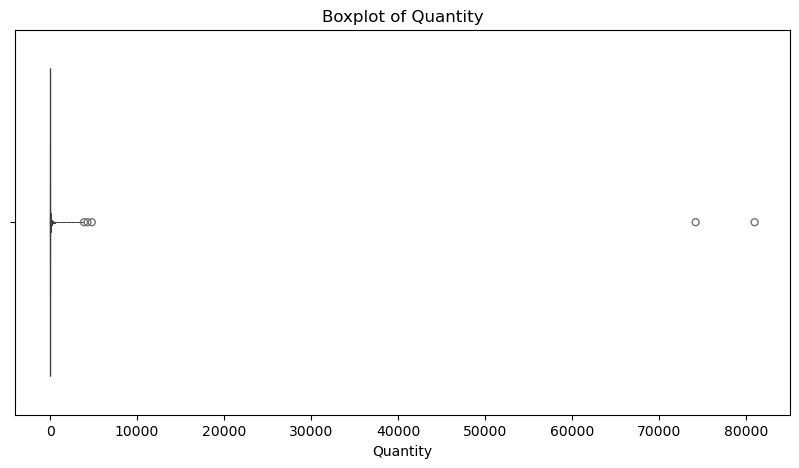

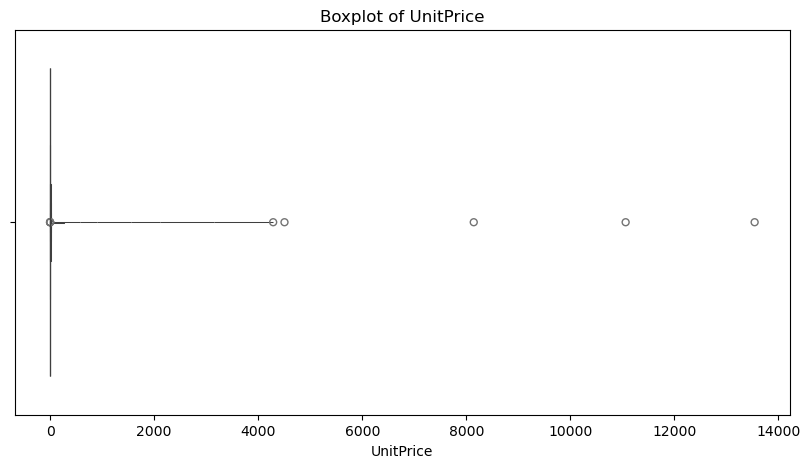

In [80]:
# Checking for outliers in the numeric columns using boxplot

# Boxplot for 'Quantiry' feature
plt.figure(figsize = (10, 5))
sns.boxenplot(x = df['Quantity'])
plt.title('Boxplot of Quantity')
plt.show() 

# Boxplot for 'UnitPrice' feature
plt.figure(figsize = (10, 5))
sns.boxenplot(x = df['UnitPrice'])
plt.title('Boxplot of UnitPrice')
plt.show()

In [81]:
# Applying the interquartile range system to selec and drop the outliers in column 'Quantity'

Q1= df['Quantity'].quantile(0.25)
Q3= df['Quantity'].quantile(0.75)
IQR = Q3-Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df_cleaned = df[(df['Quantity'] >= lower) & (df['Quantity'] <= upper)]

In [82]:
# Applying the interquartile range system to selec and drop the outliers in column 'UnitPrice'

Q1= df['UnitPrice'].quantile(0.25)
Q3= df['UnitPrice'].quantile(0.75)
IQR = Q3-Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df_cleaned = df[(df['UnitPrice'] >= lower) & (df['UnitPrice'] <= upper)]

In [83]:
# Cheking the number of features and observations of the cleaned dataset
df_cleaned.shape

(487051, 8)

In [84]:
# Checking for duplicates after cleaning
df.duplicated().sum()

0

#### Insight
While working on outliers, it was noted some negatives values in 'Quantity' and 'UnitPrice' features, so they were filtered from the dataframe, after that it was took in consideration that those negative values could represent returns made by customers, thus it was saved on a specific dataframe for possible future analysis.

After plotting the boxplot, it was detected outliers in 'Quantity' and 'UnitPrice' features. Thus, the interquartile range technique was applied to eliminate the outliers in those columns. This statistical technique consists of taking the difference between the third quartile and the first one from a group of data then it measures the central dispersion of the data, eliminating the outliers.

In [85]:
# Optimizing data types
df_cleaned = df_cleaned.copy()

df_cleaned['InvoiceNo'] = df_cleaned['InvoiceNo'].astype('category')
df_cleaned['StockCode'] = df_cleaned['StockCode'].astype('category')
df_cleaned['Description'] = df_cleaned['Description'].astype('category')
df_cleaned['Country'] = df_cleaned['Country'].astype('category')
df_cleaned['CustomerID'] = df_cleaned['CustomerID'].astype('int64')


#### Insight
The data type optimization was made to reduce memory usage during the analysis peformance.

In [86]:
# Creating additional temporal features for further analysis
df_cleaned['Year'] = df_cleaned['InvoiceDate'].dt.year
df_cleaned['Month'] = df_cleaned['InvoiceDate'].dt.month
df_cleaned['Day'] = df_cleaned['InvoiceDate'].dt.day
df_cleaned['Hour'] = df_cleaned['InvoiceDate'].dt.hour
df_cleaned['Weekday'] = df_cleaned['InvoiceDate'].dt.weekday #0 = Monday - 6 = Sunday

In [87]:
# Creating revenue column for further analysis
df_cleaned['Revenue'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']

In [88]:
# Checking the cardinality of the categorical columns
categorical_columns = ['Description', 'StockCode']
for col in categorical_columns:
    print(f'Unique Values in {col}: {df_cleaned[col].nunique()}')

Unique Values in Description: 3827
Unique Values in StockCode: 3718


#### Insight
The cardinality for those feature looks normal as the dataset is from retail.

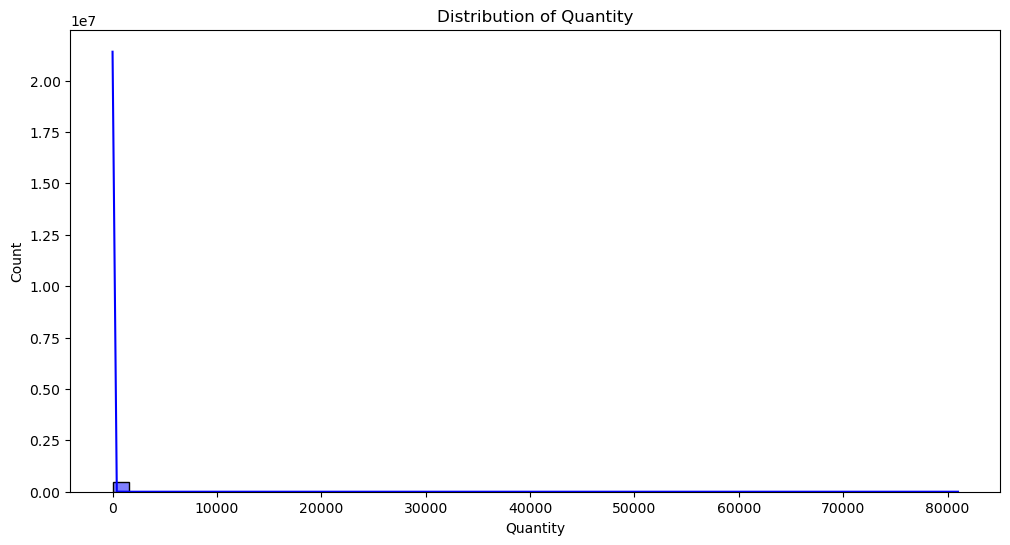

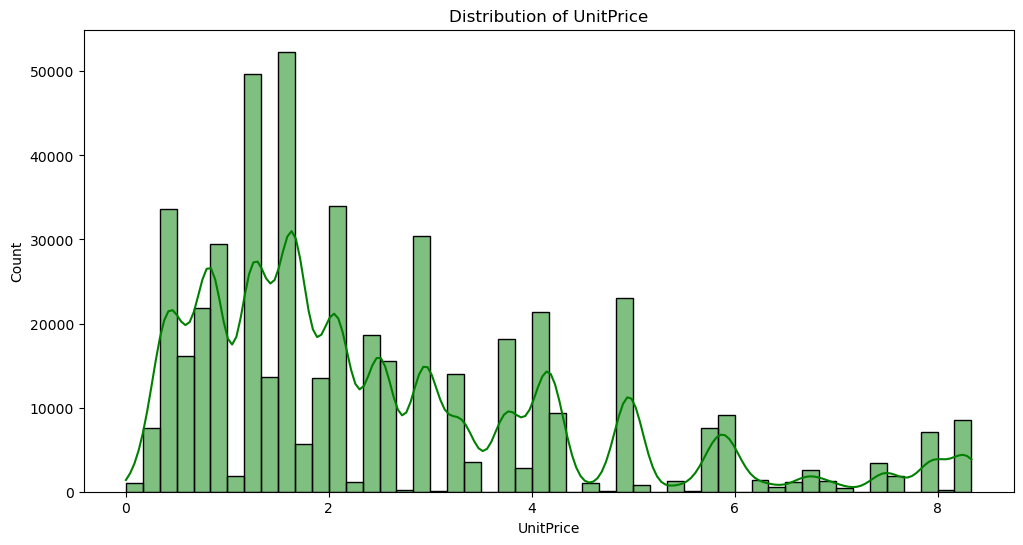

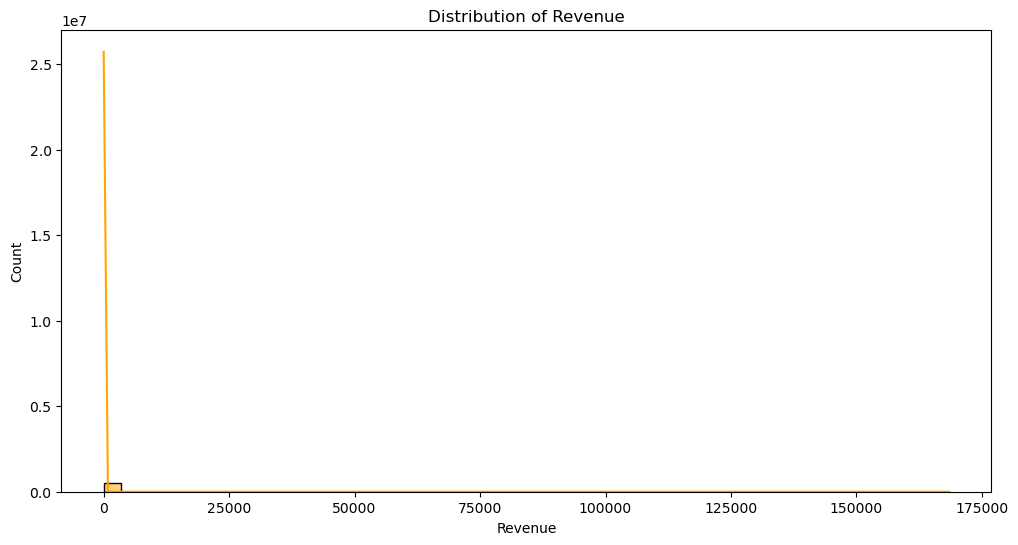

In [89]:
# Plotting the distribution of 'Quantity', 'UnitPrice' and 'Revenue' for future analysis
plt.figure(figsize = (12, 6))
sns.histplot(df_cleaned['Quantity'], kde = True, bins = 50, color = 'blue')
plt.title('Distribution of Quantity')
plt.show()

plt.figure(figsize = (12, 6))
sns.histplot(df_cleaned['UnitPrice'], kde = True, bins = 50, color = 'green')
plt.title('Distribution of UnitPrice')
plt.show()

plt.figure(figsize = (12, 6))
sns.histplot(df_cleaned['Revenue'], kde = True, bins = 50, color = 'orange')
plt.title('Distribution of Revenue')
plt.show()


In [92]:
# Normalizing the 'Quantity' and 'Revenue' features
df_cleaned['Log_Quantity'] = np.log1p(df_cleaned['Quantity'])
df_cleaned['Log_Revenue'] = np.log1p(df_cleaned['Revenue'])

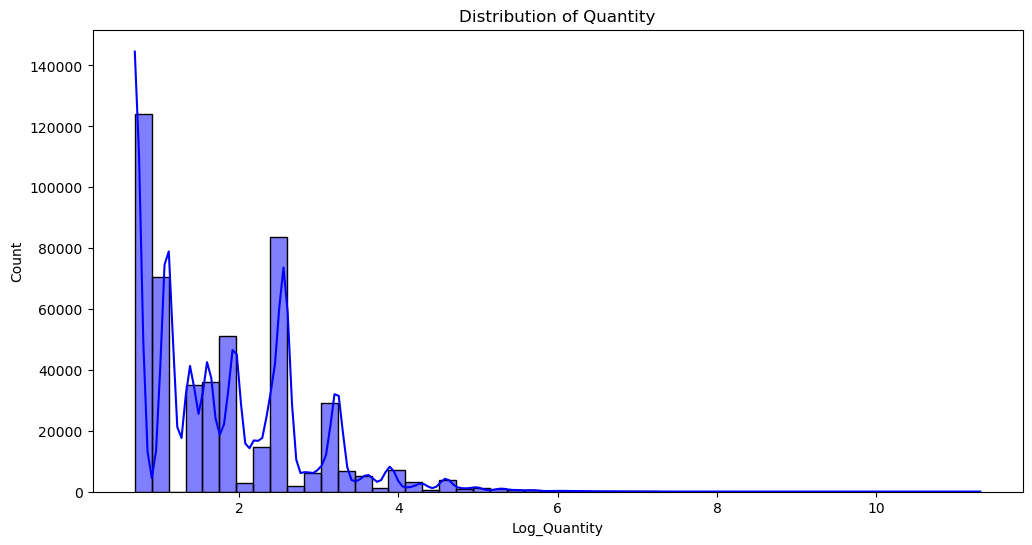

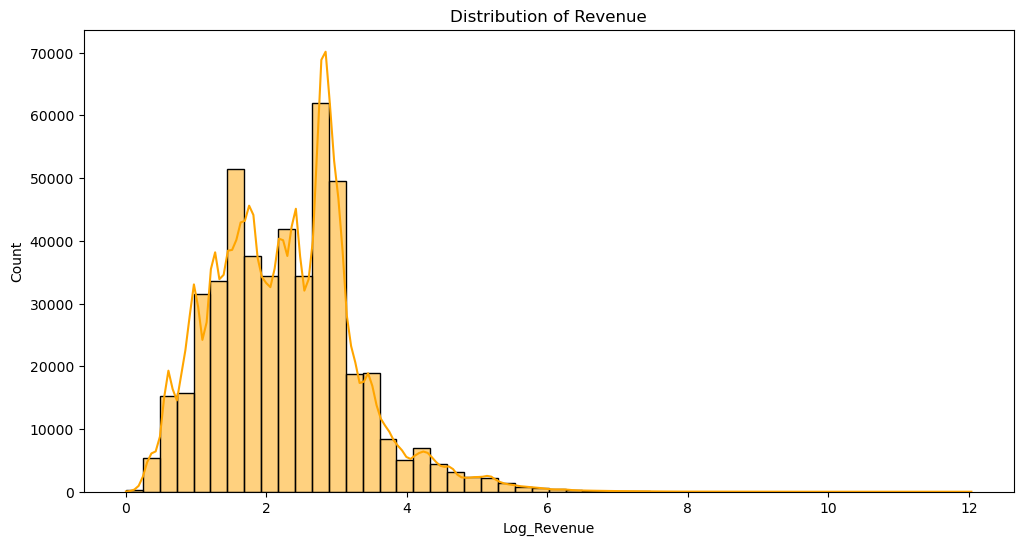

In [94]:
# Plotting the distribution of 'Quantity' and 'Revenue' after the normalization
plt.figure(figsize = (12, 6))
sns.histplot(df_cleaned['Log_Quantity'], kde = True, bins = 50, color = 'blue')
plt.title('Distribution of Quantity')
plt.show()

plt.figure(figsize = (12, 6))
sns.histplot(df_cleaned['Log_Revenue'], kde = True, bins = 50, color = 'orange')
plt.title('Distribution of Revenue')
plt.show()


#### Insight
After plotting the distribution of the 'Quantity', 'UnitPrice' and 'Revenue' features, as it can seen above, it was noteced that 'Quantity' and 'Revenue' conteined a very skewed distribution, as it is showed in the above plot, the long tail in the right side of it. Skewed data can dominate a model training, thus to avoid such thing, log transformation was applied on these features, reducing variances, making large outliers less influential, and putting data closer to a normal distribution that will be ideal for future aplication of foricasting technique.

In [96]:
# Saving the clean dataset to a file
df_cleaned.to_csv('cleaned_online_retail.csv', index = False)

## Exploratory Data Analysis (EDA)

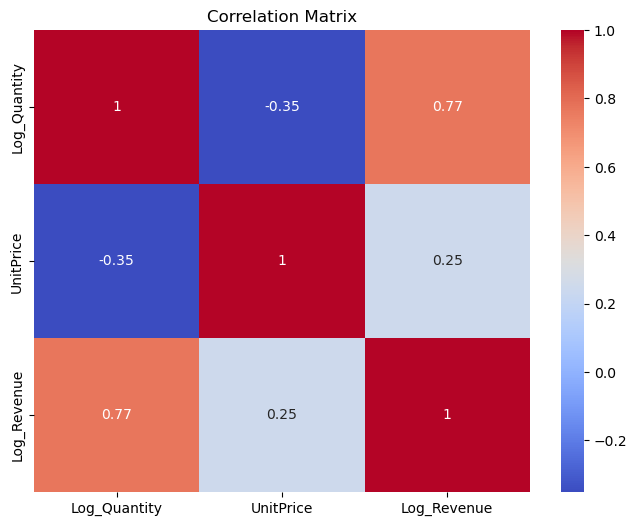

In [95]:
# Plotting correlation matrix for numerics features
plt.figure(figsize = (8, 6))
sns.heatmap(df_cleaned[['Log_Quantity', 'UnitPrice', 'Log_Revenue']].corr(), annot = True, cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show()